### Ponderada Spotify

Primeiramente para a realização da ponderada, é preciso importar todas as bibiliotecas que irão aixiliar neste projeto. Sendo elas ferramentas fundamentais na manipulação, análise e visualização de grandes volumes de dados de maneira eficiente. OFerecendo funções e estruturas otimizadas para realizar tarefas comuns de processamento e exploração de dados. 

In [506]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.preprocessing import OneHotEncoder

#### Limpeza e Tratamento de Valores Nulos

A limpeza e o tratamento de valores nulos são fundamentais para a criação do modelo preditivo. Isso é evidente quando possuimos valores nulos e outiliers, de modo que quando estivermos treinando nosso modelo, ele seja influenciado por valores exorbitantes e que foge do habitual. Por exemplo se usarmos o kmeans do qual agrupa objetos semelhantes e ao definir os centroides pode haver um determinado outilier que sozinho gere um centroide por se destiguir dos demais, impactando assim negativamente o modelo do qual estamos criando. 

Já quando se trata de valores nulos, a maioria dos modelos não conseguem lidar com estes, podendo resultar em erros de execução ou em problemas de convergência durante o treinamento do modelo. 

Sendo assim, iremos fazer agora a limpeza dos nossos dados, além de também importa-los para que os dados estejam disponíveis para o treinamento do modelo preditivo. 

In [507]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission = pd.read_csv('sample_submission.csv')


A fim de identifcar o formato dos dados e visualizar a tabela, eu utilizei a função head, esta que me mostra as cinco primeiras linhas da tabela. Nesta não consegui observar nenhum erro, principalmente por representar uma amostra muito pequena dos dados.

In [508]:

df_train.columns


Index(['track_unique_id', 'track_id', 'artists', 'album_name', 'track_name',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre',
       'popularity_target'],
      dtype='object')

Já para ver tanto os tipos das váriaveis da minha tabela, tanto o número de valores nulos, utilizei a função "Info", olhando os dados anteriormente e comparando com os tipos, vi que todos estavam corretos e que batiam com que estavam sendo exibidos na função info. Mas um ponto que me deixou em alerta foi a presença de um valor nulo nas colunas artists, album_name e track_name, evidencias essas que foram percebidas pelo número de linhas que é 34200 que não bate com com os 34199 dessas três colunas.

In [509]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

Sendo assim, já pedi para printar a linha desses valores e descobri que se tratava de uma linha, da qual não exclui pois se trata de uma linha com informações que não vão impactar meu modelo, pois se trata de nomes o que não irei utilizar para testar meu modelo.

In [510]:
linhas_com_nulos = df_train[df_train.isnull().any(axis=1)]
print(linhas_com_nulos)

Empty DataFrame
Columns: [track_unique_id, track_id, artists, album_name, track_name, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre, popularity_target]
Index: []

[0 rows x 21 columns]


Agora vou utilizar a fução describe para ver se possuem alguns valores que não correspondem com os valores determinados no enunciado do projeto, pois estes podem prejudicar meu modelo com informações que não correspondem com a realidade. 

In [511]:
df_train.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,57140.494048,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,0.487845
std,32993.196225,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,0.499855
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28450.500000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,0.000000
50%,57234.000000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,0.000000
75%,85774.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,1.000000
max,113998.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,1.000000


Analisando esses dados percebi que havia algo de errado com o min do decribe, pois não tem como uma música ter duração 0 e time_signature menor que 4, sendo assim quis investigar melhor esses dados, fazendo uma lógica que exibisse os dados que possuissem valores da coluna time_signature menor que 3 e depois que possui duretion_ms = 0. No caso da duração, percebi que se tratava da mesma linha que já havia visto anteriomente, como essa linha pode ser problematica no futuro, uma vez que vou escolher as features e duração pode ser um fator, resolvi apagar essa, ainda mais que se trata só de uma.

In [512]:
linhas_filtradas = df_train[ (df_train['duration_ms'] == 0)]
print(linhas_filtradas)
df_train = df_train.drop(linhas_filtradas.index)


Empty DataFrame
Columns: [track_unique_id, track_id, artists, album_name, track_name, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre, popularity_target]
Index: []

[0 rows x 21 columns]


In [513]:
linhas_filtradas = df_train[(df_train['time_signature'] < 3) ]
print(linhas_filtradas)
print(f"Quantidade de linhas filtradas: {len(linhas_filtradas)}")

       track_unique_id                track_id  \
437             101631  517zFFE01WR7zuNONic10C   
529               9313  3ULRZkI6hVxtgowxnaf3uX   
743              42304  0yyDKgH3Kj9CIMMATTo34N   
964              98348  4cFEDjjpNsg4WkHSt6lc3c   
973              69478  1mpa9ZlJ0XDdkq5aHw618E   
...                ...                     ...   
78741            81818  30v27OarRyhvCNNwlJYYU0   
78908            56570  5DRUnUWYHCmuRNlYsWHHyp   
78912            65545  1vKbVB1nOAVxUtqmNAstLw   
79198            16364  220KFUVjdcPP0Nw0pUpyeU   
79463            59040  2g37h9JTMtrhnfcNLA3OS6   

                                         artists  \
437    White Noise Babies;White Noise for Babies   
529                            ConeCrewDiretoria   
743                                     Fluoride   
964                                  Laura Osnes   
973                    Sadhu Kochu Kunju Upadesi   
...                                          ...   
78741                              

Já que a maioria das linhas possuem informações na coluna time_signature igual a 4, sendo esse número presente até cerca da faixa dos 75%, decidi substituir esses valores por 4, que representaria a moda dessa coluna e sendo a média também um valor bem perto.

In [514]:
df_train.loc[df_train['time_signature'] < 3, 'time_signature'] = 4

Além disso busquei ver se tinha valores nas colunas 'track_unique_id', 'artists', 'album_name' e 'track_name', que eram repitidos e obtive o número 0, logo não tirei nenhuma coluna repitida. 

In [515]:
soma_duplicados = df_train[['track_unique_id', 'artists', 'album_name', 'track_name']].duplicated(keep='first').sum()
df_train_sem_duplicatas = df_train.drop_duplicates(subset=['track_id', 'artists', 'album_name', 'track_name'], keep='first')
print(f"Número total de duplicatas: {soma_duplicados}")


Número total de duplicatas: 0


Para descobrir possíveis outliers, escolhi algumas colunas e utilizei o bloxpot. Este tipo de gráfico que mostra basicamente em que linha dos valores está cada um dos meus dados, dessa forma, é possível visualizar alguns que fogem do padrão. Como é o caso dos dados de duração que me chamaram atenção pelos valores altos presentes, sendo assim os adequei e coloquei para que estes possuissem os mesmos valores de tempo que a média, considerei valores acima de 3. Outro ponto que me chamou a atenção foi o tempo, onde possui dois valores longe dos demais, fiz então a mesma coisa que fiz com a duração, com os valores menores que 100.

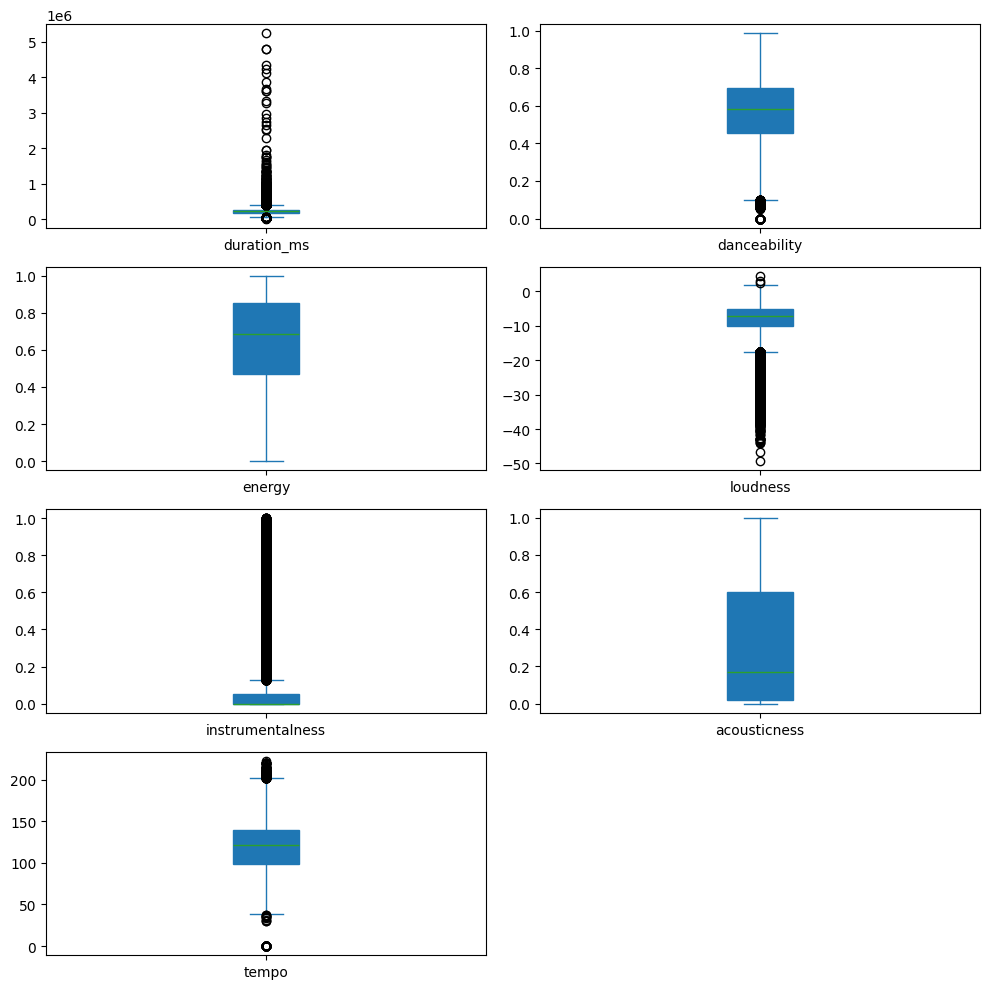

In [516]:
columns_to_plot = ['duration_ms', 'danceability', 'energy', 'loudness', 'instrumentalness', 'acousticness', 'tempo']

df_train[columns_to_plot].plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10), patch_artist=True)

plt.tight_layout()
plt.show()


In [517]:
mean_duration_ms = df_train['duration_ms'].mean()
# Converta a média para inteiro
df_train.loc[df_train['duration_ms'] > 300000, 'duration_ms'] = int(mean_duration_ms)

mean_tempo = df_train['tempo'].mean()
# Converta a média para inteiro
df_train.loc[df_train['tempo'] < 100, 'tempo'] = int(mean_tempo)

#### Codificação de Variáveis ​​Categóricas

A codificação para variáveis categóricas é uma etapa fundamental no pré-processamento de dados, ainda mais quando o assunto é a construção de modelos preditivos. 

Variáveis categóricas são aquelas que contêm valores em categorias ou rótulos discretos, como "Baixo", "Médio", "Alto". Esses valores são qualitativos e, para que os modelos possam usá-los, eles precisam ser convertidos em representações numéricas.

Mas para codificar, antes é preciso decidir quais colunas que possuem variáveis categóricas e que podemos tranformar em representações numéricas. Então decidi tranformar os dados das colunas: explicit e track_genre que são duas colunas da qual possuem dados que podem ser tranformados em representações númericas por possuirem um determinado número finito de possibilidades. Por exemplo, na coluna Explicit só pode ser sim ou não e na track_genre só podemos ter os gêneros que aparecem, vale ressaltar que há uma alta ocorrência de repetição destes também.

Como ambas variaveis são nominais ou seja que não possuem ordem, optei por utilizar o método One-Hot Encoding.

In [518]:


# Criando instâncias do OneHotEncoder
ohe_explicit = OneHotEncoder(sparse_output=False)  # Mudança aqui
ohe_genre = OneHotEncoder(sparse_output=False)   
# Codificando a coluna 'explicit'
explicit_encoded = ohe_explicit.fit_transform(df_train[['explicit']])
# Codificando a coluna 'track_genre'
genre_encoded = ohe_genre.fit_transform(df_train[['track_genre']])

# Criando DataFrames com os dados codificados
explicit_df = pd.DataFrame(explicit_encoded, columns=ohe_explicit.get_feature_names_out(['explicit']))
genre_df = pd.DataFrame(genre_encoded, columns=ohe_genre.get_feature_names_out(['track_genre']))

# Concatenando os DataFrames codificados ao DataFrame original
df_train = pd.concat([df_train, explicit_df, genre_df], axis=1)

# Exibindo as primeiras linhas com as colunas codificadas
print(df_train.head())


   track_unique_id                track_id            artists  \
0            41996  7hUhmkALyQ8SX9mJs5XI3D   Love and Rockets   
1            76471  5x59U89ZnjZXuNAAlc8X1u   Filippa Giordano   
2            54809  70Vng5jLzoJLmeLu3ayBQq      Susumu Yokota   
3            16326  1cRfzLJapgtwJ61xszs37b  Franz Liszt;YUNDI   
4           109799  47d5lYjbiMy0EdMRV8lRou            Scooter   

             album_name                              track_name  duration_ms  \
0      Love and Rockets                              Motorcycle       211533   
1      Filippa Giordano  Addio del passato - From "La traviata"       196000   
2                Symbol                      Purple Rose Minuet       216506   
3  Relajación y siestas            Liebeslied (Widmung), S. 566       218346   
4       Scooter Forever                            The Darkside       173160   

   explicit  danceability  energy  key  ...  track_genre_spanish  \
0     False         0.305  0.8490    9  ...                 

TESTE TEM QUE DOC

In [519]:
# Criando instâncias do OneHotEncoder
ohe_explicit = OneHotEncoder(sparse_output=False)  # Mudança aqui
ohe_genre = OneHotEncoder(sparse_output=False)   
# Codificando a coluna 'explicit'
explicit_encoded = ohe_explicit.fit_transform(df_test[['explicit']])
# Codificando a coluna 'track_genre'
genre_encoded = ohe_genre.fit_transform(df_test[['track_genre']])

# Criando DataFrames com os dados codificados
explicit_df = pd.DataFrame(explicit_encoded, columns=ohe_explicit.get_feature_names_out(['explicit']))
genre_df = pd.DataFrame(genre_encoded, columns=ohe_genre.get_feature_names_out(['track_genre']))

# Concatenando os DataFrames codificados ao DataFrame original
df_test = pd.concat([df_test, explicit_df, genre_df], axis=1)

# Exibindo as primeiras linhas com as colunas codificadas
print(df_test.head())

   track_unique_id                track_id                     artists  \
0           113186  6KwkVtXm8OUp2XffN5k7lY            Hillsong Worship   
1            42819  2dp5I5MJ8bQQHDoFaNRFtX                Internal Rot   
2            59311  5avw06usmFkFrPjX8NxC40  Zhoobin Askarieh;Ali Sasha   
3            91368  75hT0hvlESnDJstem0JgyR                 Bryan Adams   
4            61000  4bY2oZGA5Br3pTE1Jd1IfY                  Nogizaka46   

                        album_name             track_name  duration_ms  \
0                    No Other Name          No Other Name       440247   
1                   Grieving Birth         Failed Organum        93933   
2             Noise A Noise 20.4-1  Save the Trees, Pt. 1       213578   
3  All I Want For Christmas Is You        Merry Christmas       151387   
4                       バレッタ TypeD                  月の大きさ       236293   

   explicit  danceability  energy  key  ...  track_genre_spanish  \
0     False         0.369   0.598    7  ..

In [520]:
print(df_test)

       track_unique_id                track_id  \
0               113186  6KwkVtXm8OUp2XffN5k7lY   
1                42819  2dp5I5MJ8bQQHDoFaNRFtX   
2                59311  5avw06usmFkFrPjX8NxC40   
3                91368  75hT0hvlESnDJstem0JgyR   
4                61000  4bY2oZGA5Br3pTE1Jd1IfY   
...                ...                     ...   
34195            39480  3gD88GyMS2EVa1bSX834LH   
34196            74692  6m3xyaUiqkNQCpuGFA5ABK   
34197            53782  3qd1eI1GA0FwC3VHcxHhDC   
34198            41890  02irDahUHwaZAhr2cdumxr   
34199            97832  3RLoIn3LB72B3dNiKWjc9G   

                              artists                        album_name  \
0                    Hillsong Worship                     No Other Name   
1                        Internal Rot                    Grieving Birth   
2          Zhoobin Askarieh;Ali Sasha              Noise A Noise 20.4-1   
3                         Bryan Adams   All I Want For Christmas Is You   
4                       

Agora irei fazer as explorações dos dados para ver se conseigo algun isight e tendencia, para isso vou usar os generos musicais e visualizar quais são os que mais aparecem.

In [521]:

genre_columns = [col for col in df_train.columns if 'track_genre_' in col]

genre_counts = df_train[genre_columns].sum()


genre_df = pd.DataFrame(genre_counts).reset_index()
genre_df.columns = ['Gênero', 'Incidência']

print(genre_df)


                      Gênero  Incidência
0       track_genre_acoustic       689.0
1       track_genre_afrobeat       703.0
2       track_genre_alt-rock       687.0
3    track_genre_alternative       707.0
4        track_genre_ambient       725.0
..                       ...         ...
109       track_genre_techno       698.0
110       track_genre_trance       721.0
111     track_genre_trip-hop       712.0
112      track_genre_turkish       709.0
113  track_genre_world-music       729.0

[114 rows x 2 columns]


TESTE TEM QUE DOC

In [522]:
genre_columns = [col for col in df_test.columns if 'track_genre_' in col]

genre_counts = df_test[genre_columns].sum()


genre_df = pd.DataFrame(genre_counts).reset_index()
genre_df.columns = ['Gênero', 'Incidência']

print(genre_df)

                      Gênero  Incidência
0       track_genre_acoustic       311.0
1       track_genre_afrobeat       297.0
2       track_genre_alt-rock       313.0
3    track_genre_alternative       293.0
4        track_genre_ambient       275.0
..                       ...         ...
109       track_genre_techno       302.0
110       track_genre_trance       279.0
111     track_genre_trip-hop       288.0
112      track_genre_turkish       291.0
113  track_genre_world-music       271.0

[114 rows x 2 columns]


Explorando esses dados vi que não há uma incidência muito grande de um gênero predominante, aparentemente a diferença é bem pouca, ou seja, a uma diversidade grande de gêneros músicais. Mas ainda nessa linha de raíocinio, pensei em relacionar os resultados da coluna popularidade_target, para assim conseguir visualizar se há algum genêro que possui probabilidade maior e encontrei esse dado.

In [523]:
# Obtendo as colunas que representam os gêneros
genre_columns = [col for col in df_train.columns if col.startswith('track_genre_')]

# Criando uma lista para armazenar as probabilidades de popularidade
genre_popularity_list = []

# Iterando pelas colunas dos gêneros
for genre_column in genre_columns:
    total_songs = df_train[genre_column].sum()  # Total de músicas do gênero
    total_popular = df_train[df_train[genre_column] == 1]['popularity_target'].sum()  # Total de músicas populares
    
    # Calculando a probabilidade de popularidade, já que total_songs é sempre maior ou igual a zero
    prob_popular = total_popular / total_songs if total_songs > 0 else 0
    
    # Adicionando os dados à lista
    genre_popularity_list.append({
        'genre': genre_column, 
        'total_songs': total_songs, 
        'total_popular': total_popular, 
        'probability_popular': prob_popular
    })

# Criando um DataFrame com as probabilidades
genre_popularity = pd.DataFrame(genre_popularity_list)

# Exibindo as probabilidades
print(genre_popularity)


                       genre  total_songs  total_popular  probability_popular
0       track_genre_acoustic        689.0            445             0.645864
1       track_genre_afrobeat        703.0            101             0.143670
2       track_genre_alt-rock        687.0            407             0.592431
3    track_genre_alternative        707.0            252             0.356436
4        track_genre_ambient        725.0            564             0.777931
..                       ...          ...            ...                  ...
109       track_genre_techno        698.0            448             0.641834
110       track_genre_trance        721.0            444             0.615811
111     track_genre_trip-hop        712.0            350             0.491573
112      track_genre_turkish        709.0            688             0.970381
113  track_genre_world-music        729.0            569             0.780521

[114 rows x 4 columns]


TESTE TEM QUE DOCUMENTAR

In [524]:
# Obtendo as colunas que representam os gêneros
genre_columns = [col for col in df_train.columns if col.startswith('track_genre_')]

# Criando uma lista para armazenar as probabilidades de popularidade
genre_popularity_list = []

# Iterando pelas colunas dos gêneros
for genre_column in genre_columns:
    total_songs = df_train[genre_column].sum()  # Total de músicas do gênero
    total_popular = df_train[df_train[genre_column] == 1]['popularity_target'].sum()  # Total de músicas populares
    
    # Calculando a probabilidade de popularidade
    prob_popular = total_popular / total_songs if total_songs > 0 else 0
    
    # Adicionando os dados à lista
    genre_popularity_list.append({
        'genre': genre_column, 
        'total_songs': total_songs, 
        'total_popular': total_popular, 
        'probability_popular': prob_popular
    })

# Criando um DataFrame com as probabilidades
genre_popularity = pd.DataFrame(genre_popularity_list)

# Exibindo as probabilidades
print(genre_popularity)

# Agora, você pode usar o genre_popularity para atribuir as probabilidades a df_test
# Criando uma nova coluna de probabilidade para cada linha no df_test
probabilidade_popularidade_test = []

# Iterando sobre as linhas do DataFrame df_test
for index, row in df_test.iterrows():
    # Identificando o gênero presente (One-Hot Coded)
    for genre_column in genre_columns:
        if row[genre_column] == 1:
            # Pegando a probabilidade de popularidade do gênero
            prob_pop = genre_popularity.loc[genre_popularity['genre'] == genre_column, 'probability_popular'].values[0]
            probabilidade_popularidade_test.append(prob_pop)
            break
    else:
        # Caso nenhum gênero seja encontrado
        probabilidade_popularidade_test.append(None)

# Adicionando a coluna de probabilidade ao df_test
df_test['probabilidade_popularidade'] = probabilidade_popularidade_test

# Exibindo as primeiras linhas do DataFrame atualizado
print(df_test.head())


                       genre  total_songs  total_popular  probability_popular
0       track_genre_acoustic        689.0            445             0.645864
1       track_genre_afrobeat        703.0            101             0.143670
2       track_genre_alt-rock        687.0            407             0.592431
3    track_genre_alternative        707.0            252             0.356436
4        track_genre_ambient        725.0            564             0.777931
..                       ...          ...            ...                  ...
109       track_genre_techno        698.0            448             0.641834
110       track_genre_trance        721.0            444             0.615811
111     track_genre_trip-hop        712.0            350             0.491573
112      track_genre_turkish        709.0            688             0.970381
113  track_genre_world-music        729.0            569             0.780521

[114 rows x 4 columns]
   track_unique_id                track_

In [525]:
df_test.columns

Index(['track_unique_id', 'track_id', 'artists', 'album_name', 'track_name',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key',
       ...
       'track_genre_study', 'track_genre_swedish', 'track_genre_synth-pop',
       'track_genre_tango', 'track_genre_techno', 'track_genre_trance',
       'track_genre_trip-hop', 'track_genre_turkish',
       'track_genre_world-music', 'probabilidade_popularidade'],
      dtype='object', length=137)

In [526]:
# # Obtendo as colunas que representam os gêneros
# genre_columns = [col for col in df_test.columns if col.startswith('track_genre_')]

# # Criando uma lista para armazenar as probabilidades de popularidade
# genre_popularity_list = []

# # Iterando pelas colunas dos gêneros
# for genre_column in genre_columns:
#     total_songs = df_test[genre_column].sum()  # Total de músicas do gênero
#     total_popular = df_test[df_test[genre_column] == 1]['popularity_target'].sum()  # Total de músicas populares
    
#     # Calculando a probabilidade de popularidade, já que total_songs é sempre maior ou igual a zero
#     prob_popular = total_popular / total_songs if total_songs > 0 else 0
    
#     # Adicionando os dados à lista
#     genre_popularity_list.append({
#         'genre': genre_column, 
#         'total_songs': total_songs, 
#         'total_popular': total_popular, 
#         'probability_popular': prob_popular
#     })

# # Criando um DataFrame com as probabilidades
# genre_popularity = pd.DataFrame(genre_popularity_list)

# # Exibindo as probabilidades
# print(genre_popularity)

A partir do print acima, consegui ver que realmente há gêneros que possuem uma maior probabilidade de terem sucesso.
Após isso, criei uma nova coluna que mostra a probabilidade de popularidade com base no em seu genero musical.

In [527]:
# Criando uma nova coluna de probabilidade para cada linha
probabilidade_popularidade = []

# Iterando sobre as linhas do DataFrame
for index, row in df_train.iterrows():
    # Identificando o gênero presente (One-Hot Coded)
    for genre_column in genre_columns:
        if row[genre_column] == 1:
            # Pegando a probabilidade de popularidade do gênero
            prob_pop = genre_popularity.loc[genre_popularity['genre'] == genre_column, 'probability_popular'].values[0]
            probabilidade_popularidade.append(prob_pop)
            break

# Adicionando a coluna de probabilidade ao df_train
df_train['probabilidade_popularidade'] = probabilidade_popularidade

# Exibindo as primeiras linhas do DataFrame atualizado
print(df_train.head())


   track_unique_id                track_id            artists  \
0            41996  7hUhmkALyQ8SX9mJs5XI3D   Love and Rockets   
1            76471  5x59U89ZnjZXuNAAlc8X1u   Filippa Giordano   
2            54809  70Vng5jLzoJLmeLu3ayBQq      Susumu Yokota   
3            16326  1cRfzLJapgtwJ61xszs37b  Franz Liszt;YUNDI   
4           109799  47d5lYjbiMy0EdMRV8lRou            Scooter   

             album_name                              track_name  duration_ms  \
0      Love and Rockets                              Motorcycle       211533   
1      Filippa Giordano  Addio del passato - From "La traviata"       196000   
2                Symbol                      Purple Rose Minuet       216506   
3  Relajación y siestas            Liebeslied (Widmung), S. 566       218346   
4       Scooter Forever                            The Darkside       173160   

   explicit  danceability  energy  key  ...  track_genre_study  \
0     False         0.305  0.8490    9  ...                0.0

In [528]:
# Criando uma nova coluna de probabilidade para cada linha no df_test
probabilidade_popularidade_test = []

# Iterando sobre as linhas do DataFrame df_test
for index, row in df_test.iterrows():
    # Identificando o gênero presente (One-Hot Coded)
    for genre_column in genre_columns:
        if row[genre_column] == 1:
            # Pegando a probabilidade de popularidade do gênero
            prob_pop = genre_popularity.loc[genre_popularity['genre'] == genre_column, 'probability_popular'].values[0]
            probabilidade_popularidade_test.append(prob_pop)
            break
    else:
        # Caso nenhum gênero seja encontrado
        probabilidade_popularidade_test.append(None)

# Adicionando a coluna de probabilidade ao df_test
df_test['probabilidade_popularidade'] = probabilidade_popularidade_test

# Exibindo as primeiras linhas do DataFrame atualizado
print(df_test.head())


   track_unique_id                track_id                     artists  \
0           113186  6KwkVtXm8OUp2XffN5k7lY            Hillsong Worship   
1            42819  2dp5I5MJ8bQQHDoFaNRFtX                Internal Rot   
2            59311  5avw06usmFkFrPjX8NxC40  Zhoobin Askarieh;Ali Sasha   
3            91368  75hT0hvlESnDJstem0JgyR                 Bryan Adams   
4            61000  4bY2oZGA5Br3pTE1Jd1IfY                  Nogizaka46   

                        album_name             track_name  duration_ms  \
0                    No Other Name          No Other Name       440247   
1                   Grieving Birth         Failed Organum        93933   
2             Noise A Noise 20.4-1  Save the Trees, Pt. 1       213578   
3  All I Want For Christmas Is You        Merry Christmas       151387   
4                       バレッタ TypeD                  月の大きさ       236293   

   explicit  danceability  energy  key  ...  track_genre_study  \
0     False         0.369   0.598    7  ... 

#### Análise exploratória 

Pensando em ver as 10 maiores probabilidades com base no gênero fiz o seguinte gráfico:

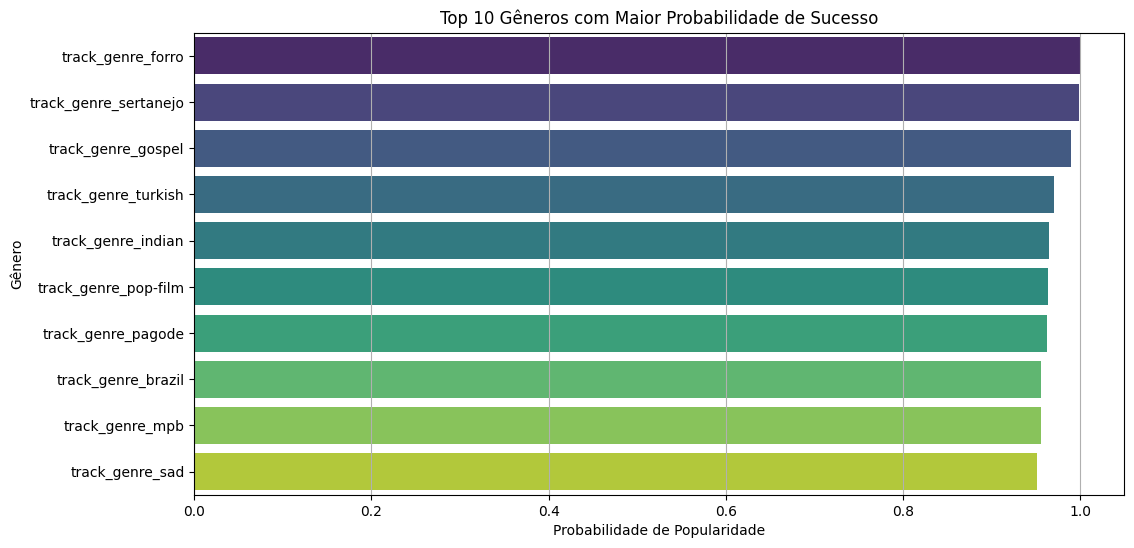

In [529]:
top_genres = genre_popularity.nlargest(10, 'probability_popular')


plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres, x='probability_popular', y='genre', hue='genre', palette='viridis', legend=False)
plt.title('Top 10 Gêneros com Maior Probabilidade de Sucesso')
plt.xlabel('Probabilidade de Popularidade')
plt.ylabel('Gênero')
plt.grid(axis='x')
plt.show()


Nesse foi possível visualizar que o genero musical forró é o que tem maior probabilidade de obter sucesso, sendo assim, caso uma música obtenha esse gênero, ela tem uma maior chance de obter popularidade. Sendo essa minha primeira hipótese, ou seja, de que o gênero pode impactar na popularidade.

C:\Users\Inteli\AppData\Local\Temp\ipykernel_23108\142290942.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_artists, x='Número_de_Músicas_Populares', y='artists', palette='viridis')


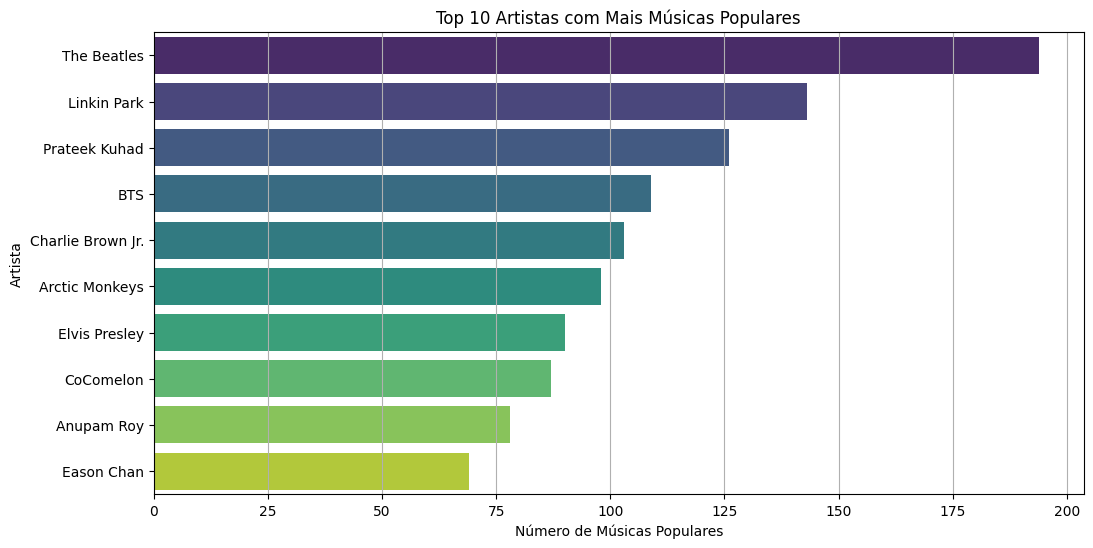

In [530]:
# Passo 1: Contar o número de músicas populares por artista
artist_popularity_counts = df_train[df_train['popularity_target'] == 1].groupby('artists').size().reset_index(name='Número_de_Músicas_Populares')

# Passo 2: Selecionar os 10 artistas com mais músicas populares
top_10_artists = artist_popularity_counts.nlargest(10, 'Número_de_Músicas_Populares')

# Passo 3: Criar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_artists, x='Número_de_Músicas_Populares', y='artists', palette='viridis')
plt.title('Top 10 Artistas com Mais Músicas Populares')
plt.xlabel('Número de Músicas Populares')
plt.ylabel('Artista')
plt.grid(axis='x')
plt.show()

Nesse gráfico podemos ver algo expressivo de como alguns artistas possuem uma chance de criar uma música popular maior, isso pode ser evidenciado pelo sucesso do artista. Criando assim também outra hipótese de que os artistas mais famosos e mais populares mundialmente, possuem uma chance maior de suas músicas serem populares.

Agora irei relacionar a popularidade com o album da qual a música esta relacionada, para ver se há um número significativo e no caso do album também impactar na chance de popularidade da música.

C:\Users\Inteli\AppData\Local\Temp\ipykernel_23108\3567452841.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_albums, x='Número_de_Músicas_Populares', y='album_name', palette='viridis')


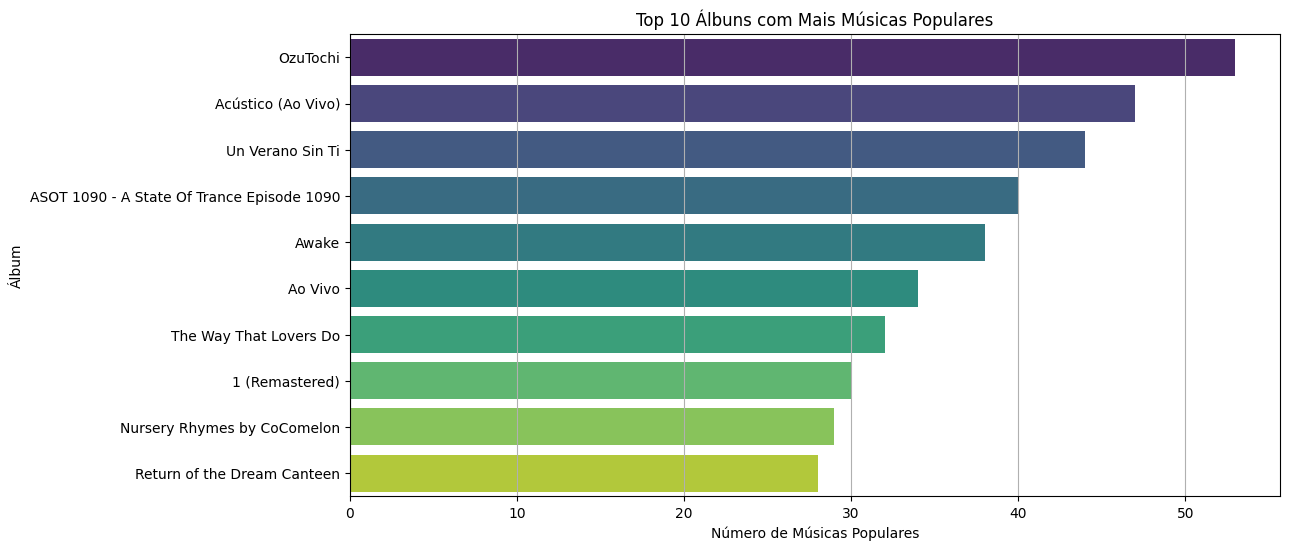

In [531]:
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 1: Contar o número de músicas populares por álbum
album_popularity_counts = df_train[df_train['popularity_target'] == 1].groupby('album_name').size().reset_index(name='Número_de_Músicas_Populares')

# Passo 2: Selecionar os 10 álbuns com mais músicas populares
top_10_albums = album_popularity_counts.nlargest(10, 'Número_de_Músicas_Populares')

# Passo 3: Criar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_albums, x='Número_de_Músicas_Populares', y='album_name', palette='viridis')
plt.title('Top 10 Álbuns com Mais Músicas Populares')
plt.xlabel('Número de Músicas Populares')
plt.ylabel('Álbum')
plt.grid(axis='x')
plt.show()


Neste código foi possível ver que realmente há albuns dos quais possuem um maior número de músicas populares, logo se caisse uma música do album OzuTochi por exemplo, ela provavelmente seria popular, pois há varias músicas neste que é popular.

#### Seleção de features

Para as features eu vou utilizar a probabilidade com base no gênero, uma vez que esta coluna em nossa hipótese mostrou um potêncial por ser influenciada pelo estilo, no qual por exemplo, se uma música é forró, ela consegue quase sempre ter sucesso. Além disso apliquei o método target encoding para utilizar as colunas de artistas e album de forma indireta, relacionando esses dados com a coluna que mostra a popularidade da música, sendo assim fiz uma média para preencher os dados decada linha destas colunas. Mas nem só desses fotores seria possível treinar meu modelo, deve ter também padrões musicais, que de alguma forma influenciam as pesssoas a gostarem dessas músicas, sendo assim escolhi também como features as colunas instrumentalness, danceability e valence.

Aplicando o método encoding, que faz parte também do processo das variáveis categóricas.

In [532]:

mean_target_by_artist = df_train.groupby('artists')['popularity_target'].mean()
df_train['artists_encoded'] = df_train['artists'].map(mean_target_by_artist)


In [533]:
mean_target_by_album = df_train.groupby('album_name')['popularity_target'].mean()
df_train['album_encoded'] = df_train['album_name'].map(mean_target_by_album)


In [534]:
# Calculando a média de popularidade por artista no df_train
mean_target_by_artist = df_train.groupby('artists')['popularity_target'].mean()

# Mapeando a média de popularidade para o df_test
df_test['artists_encoded'] = df_test['artists'].map(mean_target_by_artist)

# Calculando a média de popularidade por álbum no df_train
mean_target_by_album = df_train.groupby('album_name')['popularity_target'].mean()

# Mapeando a média de popularidade para o df_test
df_test['album_encoded'] = df_test['album_name'].map(mean_target_by_album)

# Exibindo as primeiras linhas do DataFrame atualizado
print(df_test.head())

   track_unique_id                track_id                     artists  \
0           113186  6KwkVtXm8OUp2XffN5k7lY            Hillsong Worship   
1            42819  2dp5I5MJ8bQQHDoFaNRFtX                Internal Rot   
2            59311  5avw06usmFkFrPjX8NxC40  Zhoobin Askarieh;Ali Sasha   
3            91368  75hT0hvlESnDJstem0JgyR                 Bryan Adams   
4            61000  4bY2oZGA5Br3pTE1Jd1IfY                  Nogizaka46   

                        album_name             track_name  duration_ms  \
0                    No Other Name          No Other Name       440247   
1                   Grieving Birth         Failed Organum        93933   
2             Noise A Noise 20.4-1  Save the Trees, Pt. 1       213578   
3  All I Want For Christmas Is You        Merry Christmas       151387   
4                       バレッタ TypeD                  月の大きさ       236293   

   explicit  danceability  energy  key  ...  track_genre_synth-pop  \
0     False         0.369   0.598    7  

In [535]:
df_train.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,probabilidade_popularidade,artists_encoded,album_encoded
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.197917,0.000000,0.000000
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177465,0.000000,0.000000
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095745,0.294118,1.000000
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108883,0.000000,0.000000
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.641834,0.059829,0.166667


In [536]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Definição das features e do target
features = ['album_encoded', 'artists_encoded', 'instrumentalness', 'danceability', 'valence']
X = df_train[features]
y = df_train['popularity_target']
X_test = df_test[features]

# Passo 2: Dividir os dados em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Passo 3: Criar o modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# Passo 4: Treinar o modelo
model.fit(X_train, y_train)

# Passo 5: Fazer previsões no conjunto de teste
y_pred = model.predict(X_valid)

# Passo 6: Avaliar o modelo
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print(f"Acurácia do modelo: {accuracy:.2f}")
print("Relatório de Classificação:")
print(report)

# Treinando novamente com todos os dados para fazer previsões no df_test
model.fit(X, y)
test_preds = model.predict(X_test)

# Criar DataFrame de submissão
submission = pd.DataFrame({
    'track_unique_id': df_test['track_unique_id'],
    'popularity_target': test_preds.astype(int)
})

submission.to_csv('submissao.csv', index=False)


Acurácia do modelo: 0.98
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12280
           1       0.98      0.98      0.98     11660

    accuracy                           0.98     23940
   macro avg       0.98      0.98      0.98     23940
weighted avg       0.98      0.98      0.98     23940



In [537]:
# Verificando os tamanhos
print(f"Tamanho de test_preds: {len(test_preds)}")
print(f"Tamanho de df_test: {len(df_test)}")

Tamanho de test_preds: 34200
Tamanho de df_test: 34200
